In [9]:
import numpy as np
import random
import scipy
import networkx as nx 
import matplotlib.pyplot as plt
import sys
sys.path.append('../../../')
from lcs import *

def generate_hypergraph_bipartite_edge_list(N_groups, N_inds, p_dist, g_dist):
    """
    generate_hypergraph_bipartite_edge_list(): generates a hypergraph in the style of Newman's model in "Community Structure in social and biological networks" 
    inputs:
        N_groups: the number of groups or cliques to create
        N_inds: the number of individuals to create(may be less than this total)
        p_dist: The distribution of clique sizes, must be from numpy.random
        g_dist: The distribution of number of cliques belonged to per individual
    output:
        edge_list: the edge list for a bi-partite graph. The first n-indices represent the clique edges and the rest represent individuals
    """

    chairs = []
    butts = []

    # generate chairs
    for i in range(1, N_groups + 1):
        p_n = p_dist.rvs()  # select the number of chairs in clique i
        chairs.extend([i for _ in range(int(p_n))])  # add p_n chairs belonging to clique i

    for i in range(1, N_inds + 1):
        g_m = g_dist.rvs() + 1  # select the number of butts in clique i
        g_m = int(g_m if len(butts) + g_m <= len(chairs) else len(chairs) - len(butts))  # pull a random length or select a length to make the two lists equal if we are bout to go over 
        butts.extend([i for _ in range(g_m)])  # add g_m butts to individuals i

    chairs = [chair + N_inds for chair in chairs]

    # shuffle the lists    
    random.shuffle(chairs)
    random.shuffle(butts)

    # generate edge_list 
    edge_list = list(zip(chairs, butts))
    edge_list = [(int(edge[0]), int(edge[1])) for edge in edge_list]

    # create vertex meta_data, if the index is a clique, give it a 0, if the vertex is in individual give it a 1    
    vertex_attributes = {i: 1 if i <= max(butts) else 2 for i in set(chairs + butts)}

    return edge_list, vertex_attributes

In [2]:
my_p_dist = scipy.stats.binom(30,0.5)
my_g_dist = scipy.stats.binom(5,0.5)

(array([78.,  7.,  6.,  3.,  2.,  0.,  2.,  0.,  0.,  2.]),
 array([ 4.03925825, 13.56575771, 23.09225717, 32.61875663, 42.14525609,
        51.67175555, 61.19825501, 70.72475447, 80.25125393, 89.77775339,
        99.30425285]),
 <BarContainer object of 10 artists>)

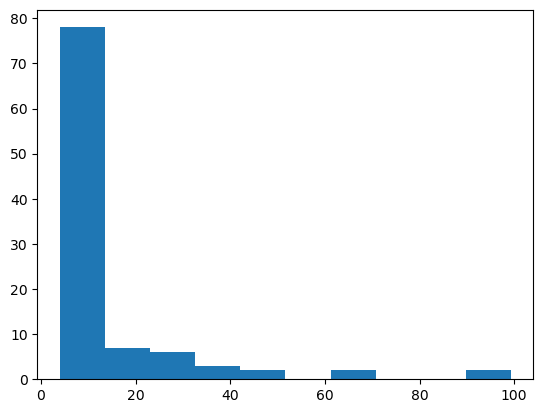

In [11]:
plt.hist(power_law(100,4,100,2))

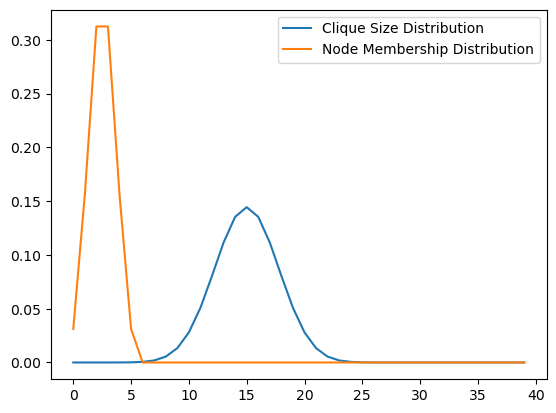

In [3]:
#plot my_p_dist
x = np.arange(0, 40, 1)
fig,ax = plt.subplots()
ax.plot(x, my_p_dist.pmf(x),label =  "Clique Size Distribution")
ax.plot(x, my_g_dist.pmf(x),label =  "Node Membership Distribution")
plt.legend()


In [4]:
edge_list,vertex_attributes = generate_hypergraph_bipartite_edge_list(10,100,my_p_dist,my_g_dist)

In [5]:
B = nx.Graph()
a = np.vstack(edge_list)
node_list1,node_list2 = np.unique(a[:,1]),np.unique(a[:,0])
B.add_nodes_from(node_list1,bipartite=0)
B.add_nodes_from(node_list2,bipartite=1)
B.add_edges_from(edge_list)

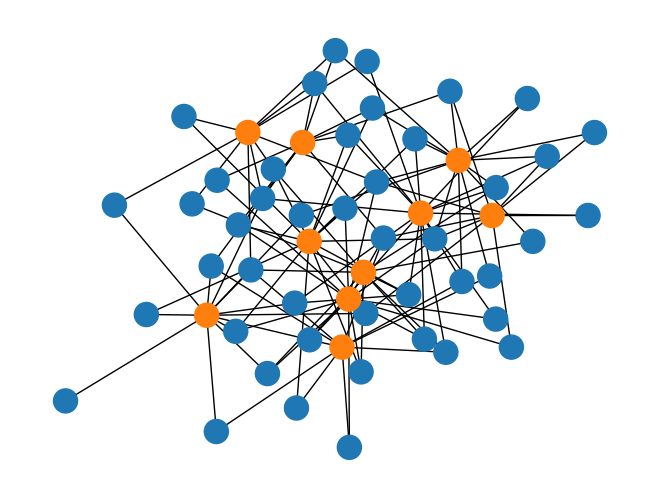

In [6]:
color_map = ['C0' if vertex_attributes[node] == 1 else 'C1' for node in B.nodes()]
nx.draw(B,node_color = color_map)

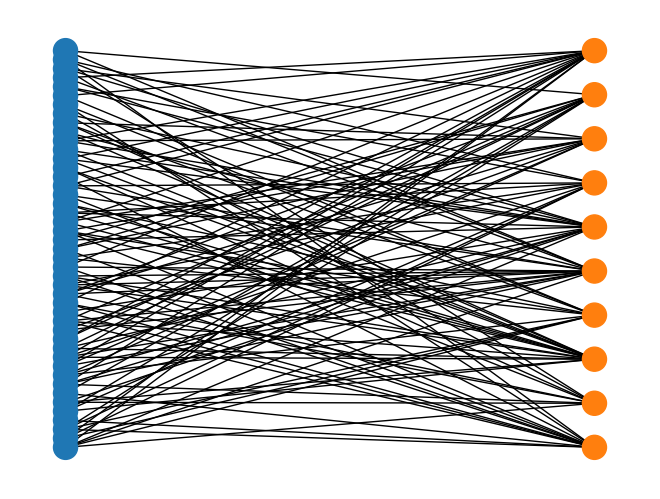

In [7]:

top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)
nx.draw(B, pos=pos,node_color = color_map)
